In [28]:
import numpy as np 
import matplotlib.pyplot as plt 

In [29]:
x = [1, 5, 4]
x.sort()
x

[1, 4, 5]

In [30]:
x.__class__

list

# A Consumer Class

In [31]:
class Consumer:
    def __init__(self, w):
        "Initialize consumer with w dollars of wealth."
        self.wealth = w
    def earn(self, y):
        "The consumer earns y dollars."
        self.wealth += y
    def spend(self, x):
        "The consumer spends x dollars if feasible."
        new_wealth = self.wealth - x
        if new_wealth < 0:
            print("Insufficent funds.")
        else:
            self.wealth = new_wealth
    

In [32]:
c1 = Consumer(10)
c1.spend(5)
c1.wealth

5

In [33]:
c1.earn(15)
c1.spend(100)

Insufficent funds.


In [34]:
c1 = Consumer(10)
c2 = Consumer(12)
c2.spend(4)
c2.wealth

8

In [35]:
c1.__dict__

{'wealth': 10}

In [36]:
print(Consumer.__dict__) # 展示__dict__属性

{'__module__': '__main__', '__init__': <function Consumer.__init__ at 0x0000021109A33700>, 'earn': <function Consumer.earn at 0x0000021109A33F70>, 'spend': <function Consumer.spend at 0x0000021109A33A60>, '__dict__': <attribute '__dict__' of 'Consumer' objects>, '__weakref__': <attribute '__weakref__' of 'Consumer' objects>, '__doc__': None}


In [37]:
# 设置一种等价表示
c1 = Consumer(10)
c1.earn(10)
c1.wealth

20

In [38]:
# 等价于
Consumer.earn(c1,10) # 这里解释了为什么需要用到self作为第一个变量参数

# Example: The Solow Growth Model

In [39]:
class Solow:
    '''
    Implements the Solow growth model with the update rule
    '''
    def __init__(self,
                 n = 0.05, # population growth rate
                 s = 0.25, # savings rate
                 delta = 0.1, # depreciation rate
                 alphas = 0.3, # share of labor
                 z = 2.0, # productivity
                 k = 1.0 ): # current capital stock
        self.n, self.s, self.delta, self.alphas, self.z = n, s, delta, alphas, z
        self.k = k
    def h(self):
        "Evaluate the h function."
        # unpack parameters (get rid of self to simplify notation)
        n, s, delta, alphas, z = self.n, self.s, self.delta, self.alphas, self.z
        # Apply the update rule
        return (s * z * (self.k ** alphas) + (1 - delta) * self.k) / (1 + n)
    def update(self):
        "Update eht current state (i.e., the capital stock)."
        self.k = self.h()
    def steady_state(self):
        "Compute the steady state value of capital."
        #Unpack parameters (get rid of self to simplify notation)
        n, s, delta, alphas, z = self.n, self.s, self.delta, self.alphas, self.z
        # Compute and return steady state
        return ((s * z) / (n + delta))**(1 / (1 - alphas))
    def generate_sequence(self, t):
        "Generate and return a time series of length t."
        path = []
        for i in range(t):
            path.append(self.k)
            self.update()
        return path

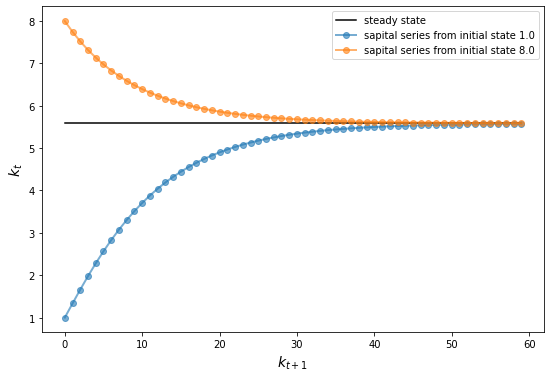

In [40]:
s1 = Solow()
s2 = Solow(k=8.0)

T = 60
fig, ax = plt.subplots(figsize = (9,6))
ax.plot([s1.steady_state()]*T, "k-", label = "steady state")

for s in s1, s2:
    lb = f"sapital series from initial state {s.k}"
    ax.plot(s.generate_sequence(T), 'o-', lw = 2, alpha = 0.6, label = lb)

ax.set_xlabel("$k_{t+1}$", fontsize = 14)
ax.set_ylabel("$k_t$", fontsize = 14)
ax.legend()
plt.show()

# Example: A Market

In [41]:
from scipy.integrate import quad

In [42]:
class Market:
    def __init__(self, ad, bd, az, bz, tax):
        self.ad, self.bd, self.az, self.bz, self.tax = ad, bd, az, bz, tax
        if ad < az:
            raise ValueError("Insufficient demand.")
    
    def price(self):
        return (self.ad - self.az + self.bz * self.tax) / (self.bd + self.bz) # 解出供需平衡时的价格

    def quantity(self):
        return self.ad - self.bd * self.price() # 解出均衡价格时的量
    
    def consumer_surp(self):
        integrand = lambda x: (self.ad / self.bd) - (1/self.bd)*x
        area, error = quad(integrand, 0, self.quantity())
        return area - self.price() * self.quantity()
    
    def producer_surp(self):
        integrand = lambda x: -(self.az / self.bz) + (1/self.bz)*x
        area, error = quad(integrand, 0, self.quantity())
        return (self.price() - self.tax) * self.quantity() - area

    def taxrev(self):
        return self.tax * self.quantity()

    def inverse_demand(self, x):
        return self.ad / self.bd - (1 / self.bd) * x

    def inverse_supply(self, x):
        return -(self.az / self.bz) + (1 / self.bz) * x + self.tax
    
    def inverse_supply_no_tax(self, x):
        return -(self.az / self.bz) + (1 / self.bz) * x

In [43]:
baseline_params = 15, .5, -2, .5, 3
m = Market(*baseline_params)
print("Equilibrium price = ", m.price())

Equilibrium price =  18.5


In [44]:
print("Consumer surplus = ", m.consumer_surp())

Consumer surplus =  33.0625


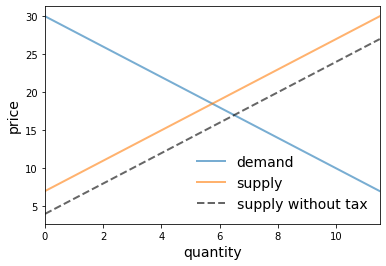

In [45]:
q_max = m.quantity() * 2
q_grid = np.linspace(0.0, q_max, 100)
pd = m.inverse_demand(q_grid)
ps = m.inverse_supply(q_grid)
psno = m.inverse_supply_no_tax(q_grid)

fig, ax = plt.subplots()
ax.plot(q_grid, pd, lw=2, alpha=0.6, label='demand')
ax.plot(q_grid, ps, lw=2, alpha=0.6, label='supply')
ax.plot(q_grid, psno, '--k', lw=2, alpha=0.6, label='supply without tax')
ax.set_xlabel('quantity', fontsize = 14)
ax.set_xlim(0, q_max)
ax.set_ylabel('price', fontsize = 14)
ax.legend(loc="lower right", frameon = False, fontsize = 14)
plt.show()

In [46]:
def deadw(m):
    m_no_tax = Market(m.ad, m.bd, m.az, m.bz, 0)
    surp1 = m_no_tax.consumer_surp() + m_no_tax.producer_surp()
    surp2 = m.consumer_surp() + m.producer_surp() + m.taxrev()
    return surp1 - surp2

In [47]:
deadw(m)

1.125

# Example: Chaos

In [48]:
class Chaos:
    def __init__(self, x0, r):
        self.x, self.r = x0, r
    
    def update(self):
        self.x = self.r * self.x * (1 - self.x)

    def generate_sequence(self,n):
        path = []
        for i in range(n):
            path.append(self.x)
            self.update()
        return path
ch = Chaos(0.1, 4.0)
ch.generate_sequence(5)

[0.1, 0.36000000000000004, 0.9216, 0.28901376000000006, 0.8219392261226498]

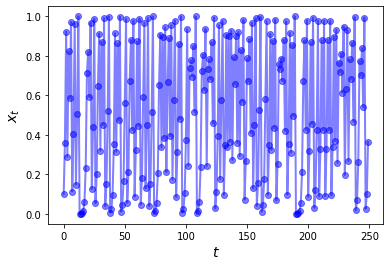

In [49]:
ch = Chaos(0.1, 4.0)
ts_length = 250

fig, ax = plt.subplots()
ax.set_xlabel('$t$', fontsize = 14)
ax.set_ylabel('$x_t$', fontsize = 14)
x = ch.generate_sequence(ts_length)
ax.plot(range(ts_length), x, 'bo-', alpha=0.5, lw=2, label='$x_t$')
plt.show()

# Special Method

In [50]:
x = (10, 20)
len(x)

2

In [51]:
class Foo:
    def __len__(self):
        return 42
f = Foo()
len(f)

42

In [52]:
class Foo:
    def __call__(self, x):
        return x + 42
f = Foo()
f(8)

50